<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the difference between a discriminator and generator in a GAN
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Concatenate, Flatten, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.losses import binary_crossentropy, kullback_leibler_divergence
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_file
from tensorflow.keras.optimizers import Adam
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, SimpleRNN
from keras.layers import LSTM
from keras.datasets import imdb

from struct import unpack
import json
import glob

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import imageio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import cKDTree
from skimage.feature import plot_matches
from skimage.filters import gaussian
from skimage.measure import ransac
from skimage.transform import AffineTransform
from skimage import color, io
from skimage.exposure import rescale_intensity
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from io import BytesIO
import PIL
from PIL import ImageDraw

from IPython.display import clear_output, Image, display, HTML
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

from keras.utils import np_utils

In [0]:
from PIL import Image, ImageOps
import requests
import tensorflow as tf
import tensorflow_hub as hub
import math

In [0]:
import numpy as np
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

In [4]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

557056/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
max_features = 20000
maxlen = 50
batch_size = 64

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [0]:
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)

In [20]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(64))

model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 11s 1ms/step - loss: 2.5222 - acc: 0.3327 - val_loss: 2.3684 - val_acc: 0.3664
Epoch 2/10
8982/8982 [==============================] - 9s 1ms/step - loss: 2.2769 - acc: 0.4027 - val_loss: 2.0591 - val_acc: 0.4568
Epoch 3/10
8982/8982 [==============================] - 10s 1ms/step - loss: 1.8600 - acc: 0.5006 - val_loss: 1.8241 - val_acc: 0.4964
Epoch 4/10
8982/8982 [==============================] - 9s 1ms/step - loss: 1.4925 - acc: 0.6250 - val_loss: 1.8861 - val_acc: 0.5071
Epoch 5/10
8982/8982 [==============================] - 10s 1ms/step - loss: 1.1830 - acc: 0.7094 - val_loss: 2.2258 - val_acc: 0.4733
Epoch 6/10
8982/8982 [==============================] - 9s 1ms/step - loss: 0.9206 - acc: 0.7749 - val_loss: 2.2973 - val_acc: 0.4911
Epoch 7/10
8982/8982 [==============================] - 9s 1ms/step - loss: 0.7445 - acc: 0.8167 - val_loss: 2.5029 - val_acc: 0.4742
Epoch 8/10


<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [21]:
!pip install google_images_download

     |████████████████████████████████| 911kB 12.7MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14547 sha256=82131d4d6cb58db5c55f619d1299b75169941fc927d86a0209e330a8da32d8bc
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [25]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal pond", "limit": 20, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal pond
Evaluating...
Starting Download...
Image URL: https://www.enchantedlearning.com/pgifs/Pondanimals.GIF
Completed Image ====> 1.Pondanimals.GIF
Image URL: https://i.ytimg.com/vi/NCbu0TND9vE/hqdefault.jpg
Completed Image ====> 2.hqdefault.jpg
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116_inline.png
Completed Image ====> 3.PKLS4116_inline.png
Image URL: https://pklifescience.com/staticfiles/articles/images/PKLS4116.png
Completed Image ====> 4.PKLS4116.png
Image URL: https://get.pxhere.com/photo/water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Completed Image ====> 5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg
Image URL: https://cdn.pixabay.com/photo/2017/04/19/20/37/frog-2243543_960_720.jpg
Completed Image ====> 6.frog-2243543_960_720.jpg
Image URL: https://i.pinimg.com/origina

At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - also check for fish.

In [26]:
image_list = absolute_image_paths[0]['animal pond']
image_list

['/content/downloads/animal pond/1.Pondanimals.GIF',
 '/content/downloads/animal pond/2.hqdefault.jpg',
 '/content/downloads/animal pond/3.PKLS4116_inline.png',
 '/content/downloads/animal pond/4.PKLS4116.png',
 '/content/downloads/animal pond/5.water-animal-pond-wildlife-mammal-fish-eat-fauna-whiskers-vertebrate-otter-mink-marmot-sea-otter-mustelidae-1383482.jpg',
 '/content/downloads/animal pond/6.frog-2243543_960_720.jpg',
 '/content/downloads/animal pond/7.12aee2aa186a7b69a66563f138bba822.jpg',
 '/content/downloads/animal pond/8.Alligator_animal_on_pond.jpg',
 '/content/downloads/animal pond/9.Pond%20Map.gif',
 '/content/downloads/animal pond/10.Gold-fish.jpg',
 '/content/downloads/animal pond/11.goose-2650209_960_720.jpg',
 '/content/downloads/animal pond/12.DSC_0009-1280x640.jpg',
 '/content/downloads/animal pond/13.06af3a_f89e7596d5254e6e8896f054e8c4ea7b~mv2_d_1650_1275_s_2.jpg',
 '/content/downloads/animal pond/14.Fishes-in-lake.jpg',
 '/content/downloads/animal pond/15.image00

In [0]:
def resize_image(filename, new_width=224, new_height=224):
    pil_image = Image.open(filename)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert('RGB')
    pil_image_rgb.save(filename, format='JPEG', quality=90)
    return filename

images = [resize_image(image) for image in image_list]

In [0]:
real_images = np.array([np.asarray(Image.open(image)) / 255 for image in images])

target_map = requests.get('https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt').content

lookup = [target.strip() for target in str(target_map).split('\\n')]

module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")

logits = module(real_images)

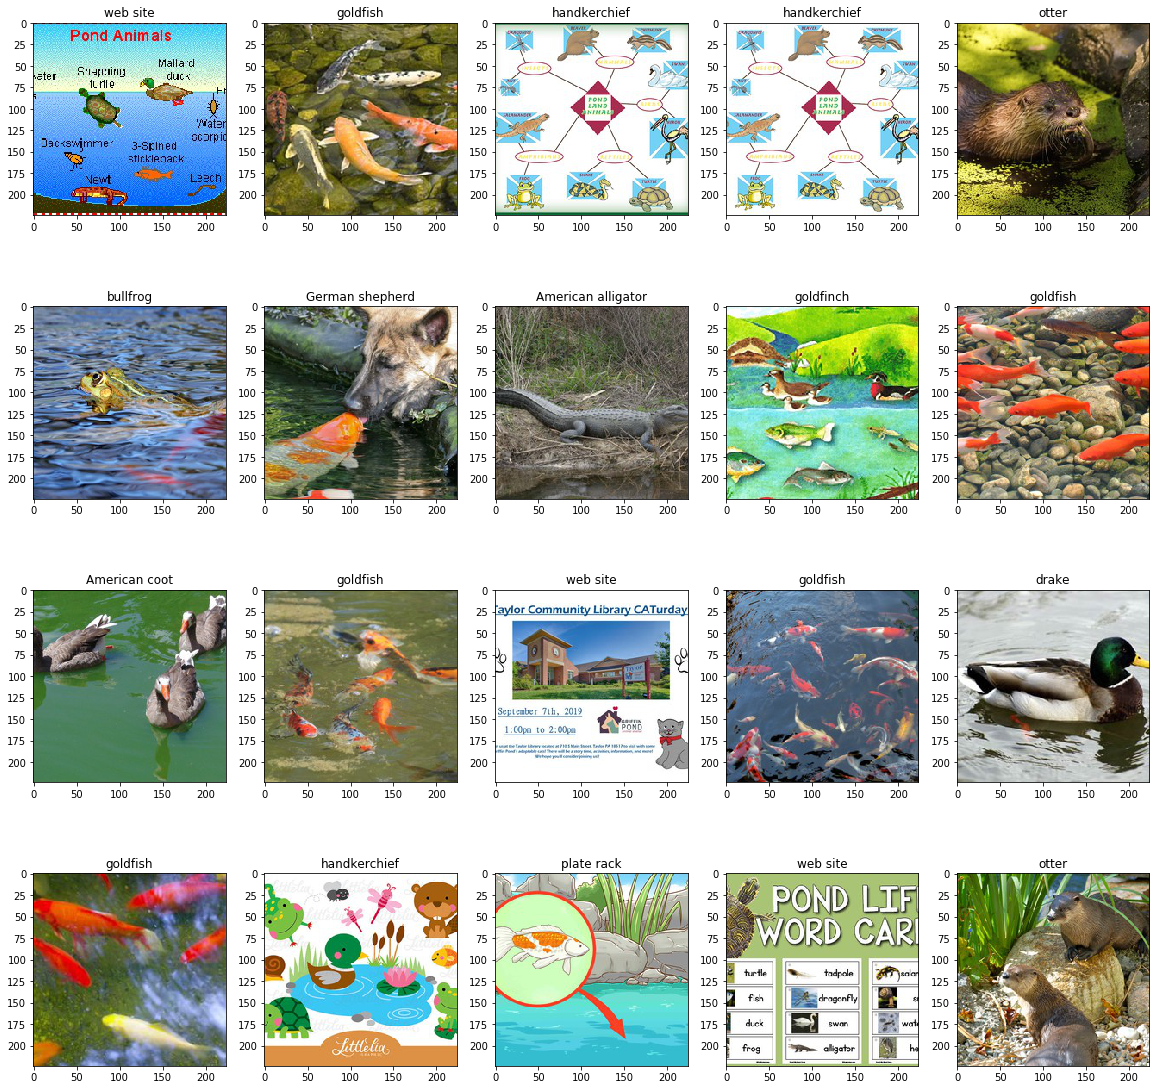

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    codes = []
    for i in range(20):
        codes.append(np.argmax(logits[i].eval()))
        
cols = 5
rows = math.ceil(len(images)/5)
fig=plt.figure(figsize=(20, 20))
with tf.Session() as sess:
    for idx,image in enumerate(real_images):
        fig.add_subplot(rows, cols, idx+1)
        plt.imshow(image)
        plt.title(lookup[codes[idx]])
plt.savefig('animals.jpg', dpi=120)
plt.show()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ One example of a use case for an autoencoder would be to detect anomalies in a given output.

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
  I think currently, my strongest area as a data scientist is in exploratory 
  data analysis and data visualization. Most likely because I have the most     practice in those areas.
  
- What area of Data Science would you most like to learn more about, and why?
  I really want to learn more about NLP because I'm a bookwarm at heart and also as a multi-linngual person, I'm really interested in the advancements that will happen in that space.
  
- Where do you think Data Science will be in 5 years?
  I hope data science will be at the forefront of technologies making people's lives more fulfilling. In medicine, architecture, and even in the arts. I hope that the public sentiment around AI will become more positives as society hopefully experiences more of the benefits.
  
- What are the threats posed by AI to our society?
  I think the threats posed by AI are posed by the people wielding the power. If we use AI as a means to create more jobs or more meaningful ways for humans to spend their days, AI doesn't have to be a threat. But that depends upon who is in charge.
  
- How do you think we can counteract those threats? 
  We need to re-think our values as a society. We've spent decades telling people that the only way to find meaning through life is by working night and day. We also need backup plans and training programs for new jobs for people whose jobs will eventually be taken over. One popular idea is the universal basic income. 
  
- Do you think achieving General Artifical Intelligence is ever possible?
  I think it is. I'm not sure if it would be fully achieved in my lifetime given the amount of information the algorithms would need to be trained on though.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [0]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")